# *Linear Regression Model*

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

In [3]:
jump = pd.read_csv('../../Desktop/Machine Learning in R/jump.csv')


In [5]:
jump = jump.iloc[:, 1:]

In [7]:
jump.head()

,cmj_performance,max_squat,max_bench,body_fat,Weight,RSI,squat_jump,sprint10m
0,48.3,118.0,66.8,9.7,83.9,1.93,39.7,1.98
1,56.7,130.7,116.9,9.4,84.6,2.48,46.6,1.92
2,62.1,126.6,81.6,8.2,65.1,2.43,54.9,1.84
3,71.7,157.8,97.5,8.9,78.3,2.93,61.2,1.96
4,65.1,121.8,82.3,7.3,73.1,2.72,57.5,1.92


In [14]:
jump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cmj_performance  60 non-null     float64
 1   max_squat        60 non-null     float64
 2   max_bench        60 non-null     float64
 3   body_fat         60 non-null     float64
 4   Weight           60 non-null     float64
 5   RSI              60 non-null     float64
 6   squat_jump       60 non-null     float64
 7   sprint10m        60 non-null     float64
dtypes: float64(8)
memory usage: 3.9 KB


In [12]:
jump.shape

(60, 9)

### Missing Values

In [10]:
jump.isna().sum()

cmj_performance    0
max_squat          0
max_bench          0
body_fat           0
Weight             0
RSI                0
squat_jump         0
sprint10m          0
dtype: int64

### EDA

In [28]:
def hist_plot (data):
    for col in data.select_dtypes('number').columns:
        sns.histplot(data=data, x=data[col])
        plt.xlabel(col)
        plt.show()

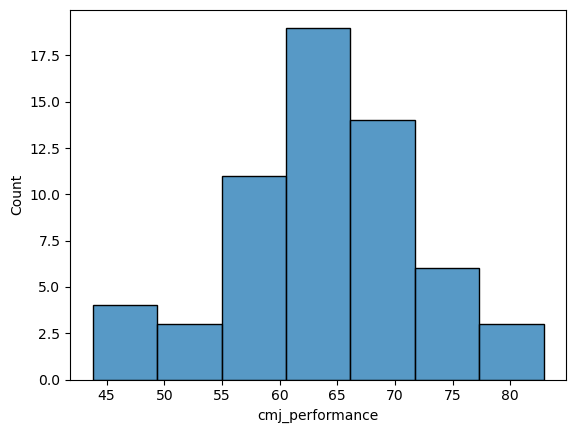

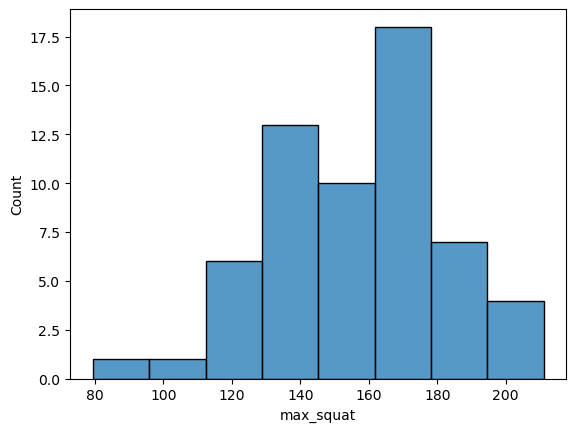

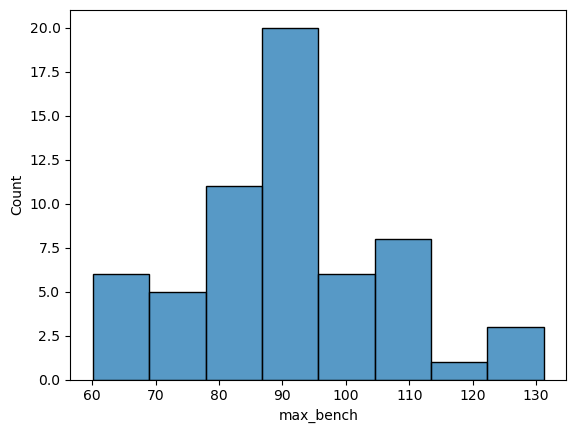

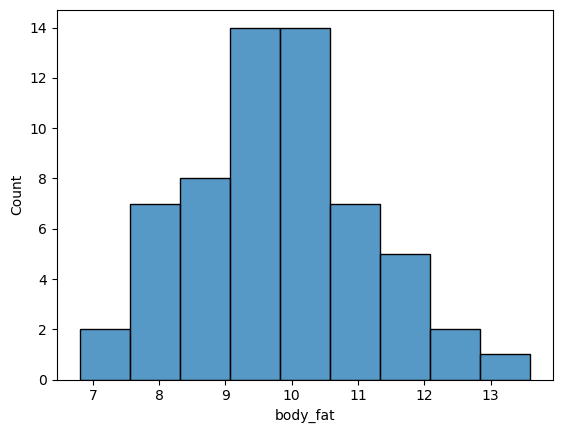

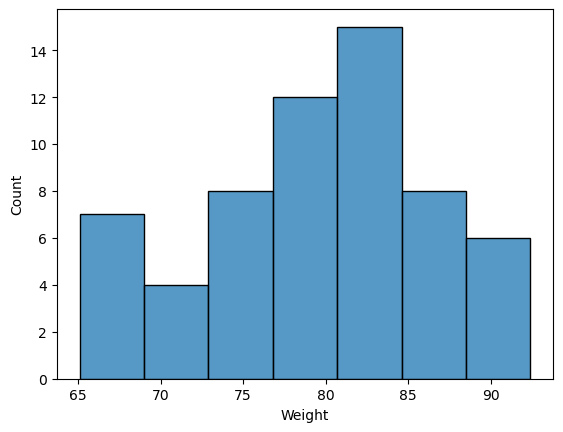

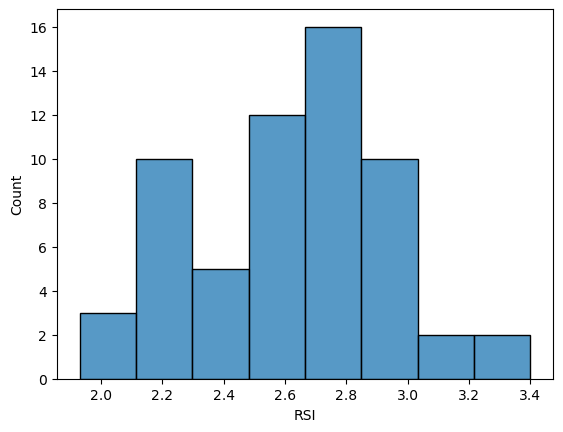

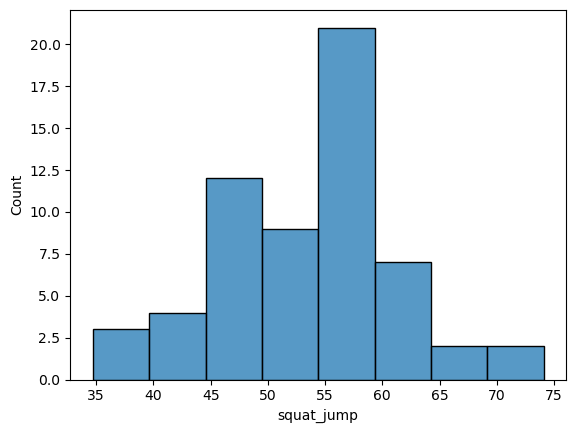

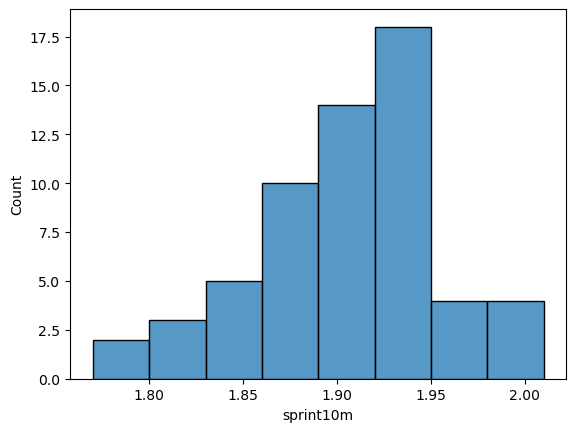

In [30]:
hist_plot(jump)

In [32]:
jump.corr(numeric_only=True)

,cmj_performance,max_squat,max_bench,body_fat,Weight,RSI,squat_jump,sprint10m
cmj_performance,1.000000,0.657501,0.191021,-0.152514,0.014865,0.948796,0.977830,0.013917
max_squat,0.657501,1.000000,0.030921,0.632883,0.108544,0.615683,0.611196,-0.052788
max_bench,0.191021,0.030921,1.000000,-0.105479,0.161151,0.232362,0.157437,0.056384
body_fat,-0.152514,0.632883,-0.105479,1.000000,0.177006,-0.152505,-0.190419,-0.050499
Weight,0.014865,0.108544,0.161151,0.177006,1.000000,0.025090,-0.002306,0.126196
RSI,0.948796,0.615683,0.232362,-0.152505,0.025090,1.000000,0.918179,0.060204
squat_jump,0.977830,0.611196,0.157437,-0.190419,-0.002306,0.918179,1.000000,-0.014638
sprint10m,0.013917,-0.052788,0.056384,-0.050499,0.126196,0.060204,-0.014638,1.000000


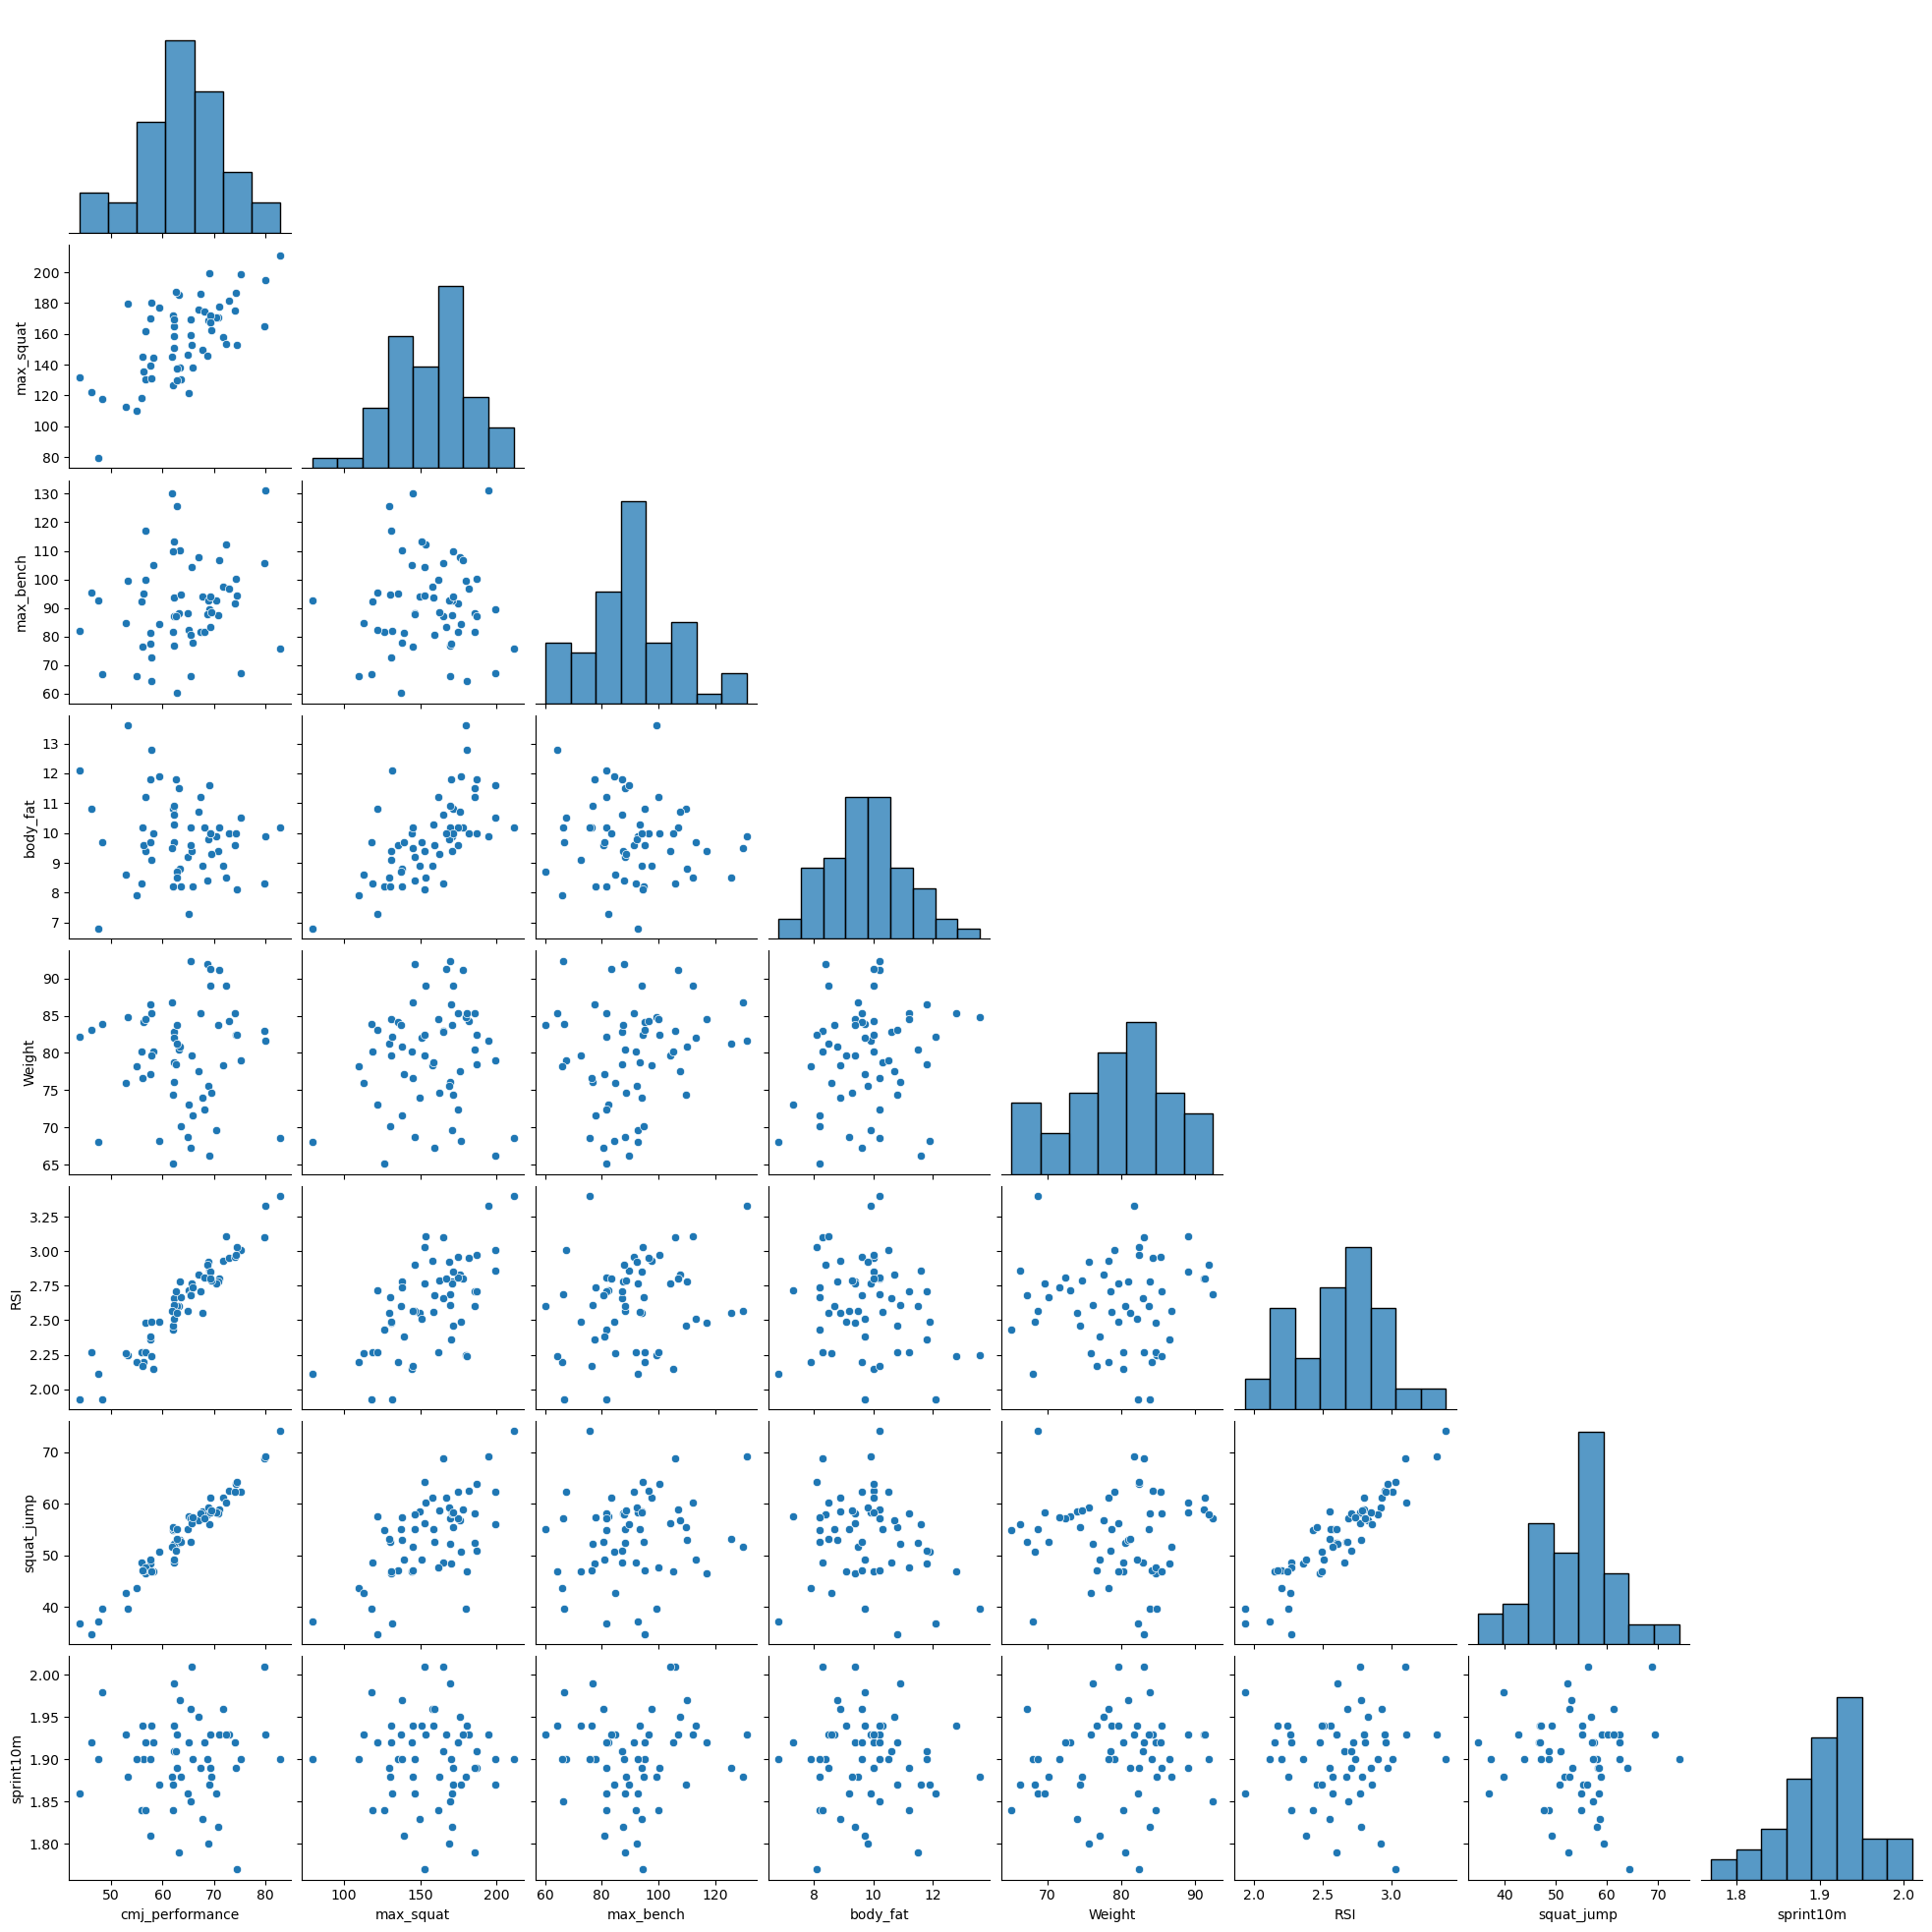

In [34]:
sns.pairplot(jump, corner=True)

### Building a Simple Linear Regression Model

In [37]:
import statsmodels.api as sm

In [16]:
from sklearn.model_selection import train_test_split

In [74]:
X = sm.add_constant(jump[['squat_jump', 'RSI']])
y = np.log(jump['cmj_performance'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=2024)

In [76]:
model_simple = sm.OLS(y, X).fit()
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        cmj_performance   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     692.1
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.05e-40
Time:                        08:56:27   Log-Likelihood:                 133.57
No. Observations:                  60   AIC:                            -261.1
Df Residuals:                      57   BIC:                            -254.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2047      0.030    107.222      0.000       3.145       3.265
squat_jump     0.0118      0.001     10.715      0.000       0.010       0.014
RSI            0.1182      0.028      4.277      0.000       0.063       0.174
==============================================================================
Omnibus:                        6.479   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.994
Skew:                          -0.543   Prob(JB):                       0.0499
Kurtosis:                       4.103   Cond. No.                         575.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

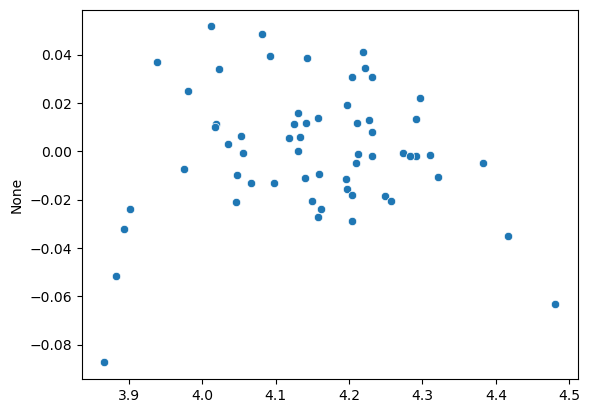

In [78]:
sns.scatterplot(x=model_simple.predict(), y=model_simple.resid)

In [80]:
mae(y, model_simple.predict())

0.019764990708559794

In [82]:
np.exp(0.019764990708559794)

1.01996161140304

In [64]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [66]:
def residual_analysis_plot(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize = (10, 5))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('Predictions')
    ax[0].set_ylabel('Residuals')

    stats.probplot(residuals, dist='norm', plot=plt)
    ax[1].set_title('Normal Q-Q Plot')
    

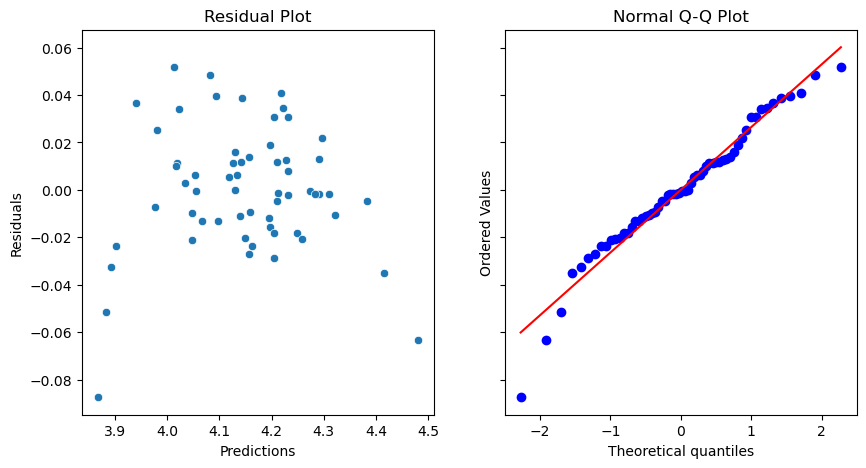

In [84]:
residual_analysis_plot(model_simple)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [88]:
# VIF calculation in Python
pd.Series(
    [vif (X.values, i) for i in range(X.shape[1])],
    index= X.columns
)

const         74.637071
squat_jump     6.371586
RSI            6.371586
dtype: float64

In [94]:
influence = model_simple.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_squat_jump,dfb_RSI,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.305097,-0.078351,0.183501,0.034013,-0.939777,0.103568,-0.319433,-0.938798,-0.319100
1,-0.012586,0.061103,-0.047062,0.002278,-0.379554,0.045292,-0.082670,-0.376686,-0.082046
2,-0.065318,-0.101145,0.106750,0.004966,-0.426012,0.075864,-0.122059,-0.422933,-0.121177
3,0.002617,-0.000390,-0.000918,0.000007,-0.025639,0.032453,-0.004696,-0.025414,-0.004654
4,0.007827,-0.068158,0.045643,0.008841,-1.085235,0.022025,-0.162861,-1.086961,-0.163121


In [96]:
inf_summary_df['cooks_d'].sort_values(ascending=True)

24    5.543560e-09
36    6.755273e-06
3     7.349784e-06
42    1.707104e-05
15    5.829492e-05
37    6.053005e-05
39    8.318518e-05
28    1.790747e-04
47    2.158914e-04
35    2.557928e-04
14    3.176814e-04
41    3.552091e-04
46    7.595266e-04
52    8.806421e-04
9     9.815414e-04
45    1.397393e-03
29    1.436081e-03
50    1.601256e-03
43    1.636470e-03
38    1.688861e-03
55    1.844086e-03
7     2.200866e-03
1     2.278121e-03
8     2.334441e-03
57    2.386360e-03
6     2.584326e-03
40    2.742434e-03
16    2.762383e-03
49    3.172163e-03
26    3.198526e-03
54    3.738939e-03
11    4.228527e-03
56    4.247098e-03
2     4.966149e-03
33    5.718975e-03
20    6.262286e-03
4     8.841285e-03
58    8.925484e-03
22    1.020422e-02
10    1.109229e-02
19    1.116289e-02
23    1.217435e-02
30    1.314484e-02
25    1.514986e-02
12    1.579506e-02
27    1.758897e-02
5     1.810745e-02
53    1.957611e-02
17    2.036408e-02
51    2.861078e-02
31    2.896200e-02
0     3.401251e-02
32    5.8945